# 第九章 数据预处理

## 9.1

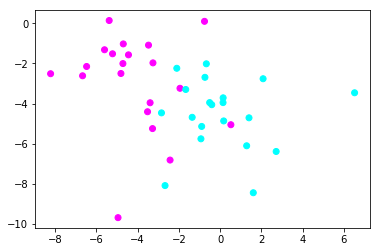

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples = 40, centers = 2, random_state = 50, cluster_std = 2)
plt.scatter(X[:, 0],X[:, 1], c=y,cmap = plt.cm.cool)
plt.show()

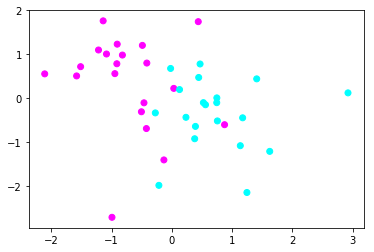

In [2]:
from sklearn.preprocessing import StandardScaler
X_1 = StandardScaler().fit_transform(X)
plt.scatter(X_1[:, 0],X_1[:, 1], c=y,cmap = plt.cm.cool)
plt.show()

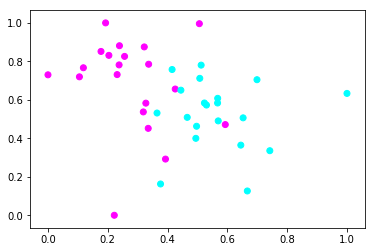

In [3]:
from sklearn.preprocessing import MinMaxScaler
X_2 = MinMaxScaler().fit_transform(X)
plt.scatter(X_2[:, 0],X_2[:, 1], c=y,cmap = plt.cm.cool)
plt.show()

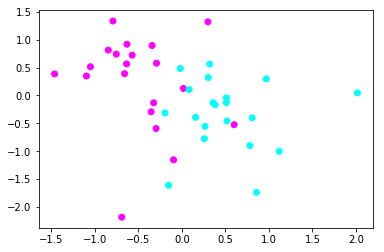

In [4]:
from sklearn.preprocessing import RobustScaler
X_3  = RobustScaler().fit_transform(X)
plt.scatter(X_3[:, 0],X_3[:, 1], c=y,cmap = plt.cm.cool)
plt.show()

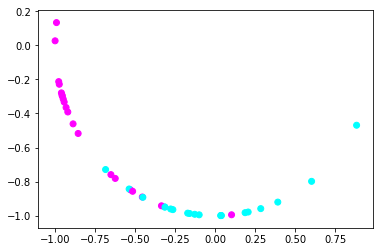

In [5]:
from sklearn.preprocessing import Normalizer
X_4 = Normalizer().fit_transform(X)
plt.scatter(X_4[:, 0],X_4[:, 1], c=y,cmap = plt.cm.cool)
plt.show()

In [6]:
from sklearn.datasets import load_wine
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
wine = load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target,
                                                   random_state = 62)
print(X_train.shape, X_test.shape)

(133, 13) (45, 13)


In [7]:
mlp = MLPClassifier(hidden_layer_sizes=[100,100],max_iter=400,
                    random_state=62)
mlp.fit(X_train, y_train)
print('模型得分：{:.2f}'.format(mlp.score(X_test, y_test)))

模型得分：0.93


E:\Anaconda\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [8]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_pp = scaler.transform(X_train)
X_test_pp = scaler.transform(X_test)
mlp.fit(X_train_pp,y_train)
print('模型得分：{:.2f}'.format(mlp.score(X_test_pp, y_test)))

模型得分：1.00


## 9.2

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = wine.data
y = wine.target
X_scaled = scaler.fit_transform(X)
print(X_scaled.shape)

(178, 13)


In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.fit_transform(X_scaled)
print(X_pca.shape)

(178, 2)


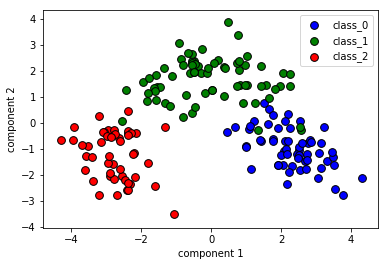

In [11]:
X0 = X_pca[wine.target==0]
X1 = X_pca[wine.target==1]
X2 = X_pca[wine.target==2]
plt.scatter(X0[:,0],X0[:,1],c='b',s=60,edgecolor='k')
plt.scatter(X1[:,0],X1[:,1],c='g',s=60,edgecolor='k')
plt.scatter(X2[:,0],X2[:,1],c='r',s=60,edgecolor='k')

plt.legend(wine.target_names, loc='best')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show()

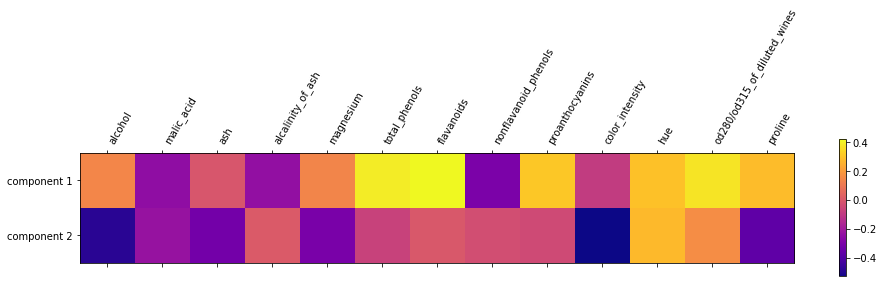

In [12]:
plt.matshow(pca.components_, cmap='plasma')
plt.yticks([0,1], ['component 1','component 2'])
plt.colorbar()
plt.xticks(range(len(wine.feature_names)),wine.feature_names,
          rotation = 60,ha = 'left' )
plt.show()

## 9.3

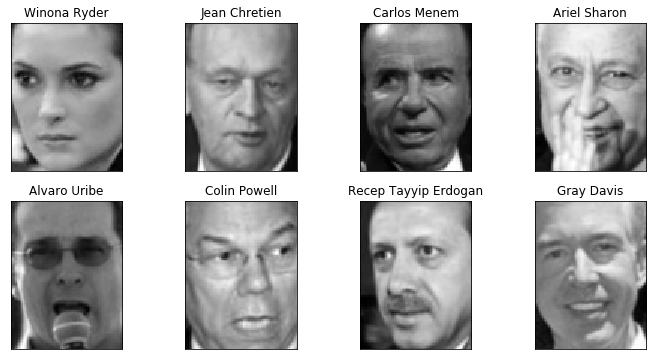

In [13]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=20, resize=0.8)
image_shape = faces.images[0].shape
fig, axes = plt.subplots(2,4,figsize=(12,6),
                        subplot_kw={'xticks':(),'yticks':()})
for target,image,ax in zip(faces.target,faces.images,axes.ravel()):
    ax.imshow(image, cmap=plt.cm.gray)
    ax.set_title(faces.target_names[target])
plt.show()

In [17]:
from sklearn.neural_network import MLPClassifier
X_train, X_test, y_train, y_test = train_test_split(faces.data/255, 
                                                    faces.target,
                                                   random_state=62)
mlp=MLPClassifier(hidden_layer_sizes=[100,100], random_state=62,
                  max_iter=400)
mlp.fit(X_train, y_train)
print('模型识别准确率:{:.2f}'.format(mlp.score(X_test, y_test)))

模型识别准确率:0.56


In [15]:
pca = PCA(whiten=True, n_components=0.9, random_state=62).fit(X_train)
X_train_whiten = pca.transform(X_train)
X_test_whiten = pca.transform(X_test)
print('白化后数据形态：{}'.format(X_train_whiten.shape))

白化后数据形态：(2267, 105)


In [16]:
mlp.fit(X_train_whiten, y_train)
print('数据白化后模型识别准确率:{:.2f}'.format(mlp.score(X_test_whiten, 
                                             y_test)))

数据白化后模型识别准确率:0.57


In [18]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=105,random_state=62).fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)
print('NMF处理后数据形态：{}'.format(X_train_nmf.shape))

NMF处理后数据形态：(2267, 105)


In [19]:
mlp.fit(X_train_nmf, y_train)
print('nmf处理后模型准确率：{:.2f}'.format(mlp.score(X_test_nmf,
                                           y_test)))

nmf处理后模型准确率：0.56


E:\Anaconda\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


## 9.4 聚类算法

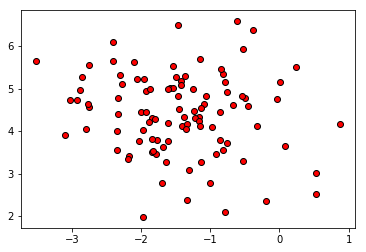

In [20]:
from sklearn.datasets import make_blobs
blobs = make_blobs(random_state=1,centers=1)
X_blobs = blobs[0]
plt.scatter(X_blobs[:,0],X_blobs[:,1],c='r',edgecolor='k')
plt.show()

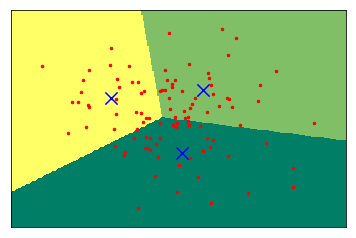

In [21]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_blobs)

#下面是用来画图的代码
x_min, x_max = X_blobs[:, 0].min()-0.5 , X_blobs[:, 0].max()+0.5 
y_min, y_max = X_blobs[:, 1].min()-0.5 , X_blobs[:, 1].max()+0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), 
                     np.arange(y_min, y_max, .02))


Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.summer,
           aspect='auto', origin='lower')

plt.plot(X_blobs[:, 0], X_blobs[:, 1], 'r.', markersize=5)
#用蓝色叉号代表聚类的中心
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=150, linewidths=3,
            color='b', zorder=10)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [22]:
print("K均值的聚类标签:\n{}".format(kmeans.labels_))

K均值的聚类标签:
[0 0 2 1 1 1 0 0 2 1 0 1 0 2 0 1 1 0 2 2 1 2 0 0 0 0 1 0 0 0 2 2 0 0 1 2 1
 2 0 2 1 0 2 2 1 1 1 0 2 0 2 0 1 2 1 1 2 1 1 0 1 2 1 0 2 1 2 2 0 1 1 0 1 1
 1 0 1 0 0 2 1 2 1 1 2 0 1 0 2 2 1 0 2 2 1 1 0 1 1 0]


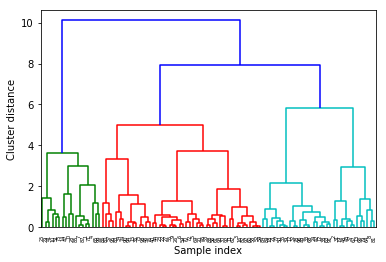

In [23]:
from scipy.cluster.hierarchy import dendrogram, ward
linkage = ward(X_blobs)
dendrogram(linkage)
ax = plt.gca()
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")
plt.show()

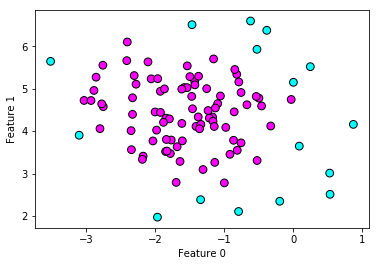

In [24]:
from sklearn.cluster import DBSCAN
db = DBSCAN()
clusters = db.fit_predict(X_blobs)
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=clusters, cmap=plt.cm.cool,
            s=60,edgecolor='k')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

In [26]:
print('聚类的个数为：{}'.format(clusters))

聚类的个数为：[-1  0 -1  0 -1  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0
  0 -1  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1
  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0 -1  0  0  0  0  0  0  0
  0  0 -1 -1  0  0  0  0 -1  0  0 -1  0  0 -1  0  0  0  0  0  0  0  0 -1
  0  0  0 -1]


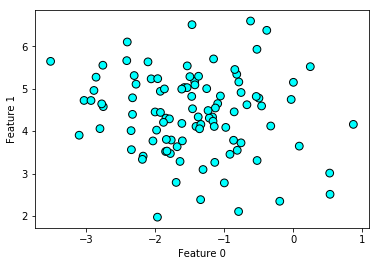

In [27]:
db_1 = DBSCAN(eps = 2)
clusters_1 = db_1.fit_predict(X_blobs)
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=clusters_1, cmap=plt.cm.cool,
            s=60,edgecolor='k')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

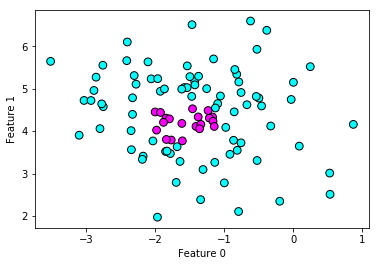

In [28]:
db_2 = DBSCAN(min_samples=20)
clusters_2 = db_2.fit_predict(X_blobs)
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=clusters_2, cmap=plt.cm.cool,
            s=60,edgecolor='k')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()